In [3]:
output_file = 'pytorch_static_output.txt'
# !python pytorch_static.py > {output_file}

In [4]:
import pandas as pd
import ast

def get_rewards(file_path):

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store data
    episodes = []
    rewards = []
    num_tasks = []
    num_resources = []

    # Parse the file
    for line in lines:
        if line.startswith("Episode"):
            # Extract episode number and reward
            episode_info = line.strip().split(":")
            episode = int(episode_info[0].split()[1])  # Extract episode number
            reward = float(episode_info[2].strip())    # Extract reward
            episodes.append(episode)
            rewards.append(reward)
        elif line.startswith("[{"):
            # Extract the number of tasks or resources
            data = ast.literal_eval(line.strip())  # Convert string to list of dictionaries
            if 'complexity' in data[0]:  # This line contains task information
                num_tasks.append(len(data))
            elif 'cpu_capacity' in data[0]:  # This line contains resource information
                num_resources.append(len(data))

    # Create a DataFrame
    df_rewards = pd.DataFrame({
        'Episode': episodes,
        'Reward': rewards,
        'Number_of_Tasks': num_tasks,
        'Number_of_Resources': num_resources
    })

    return df_rewards

# Example usage:
df_rewards = get_rewards(output_file)
display(df_rewards)

,Episode,Reward,Number_of_Tasks,Number_of_Resources
0,0,0.0,10,3
1,1,0.0,10,3
2,2,-4.0,10,3
3,3,2.0,10,3
4,4,-4.0,10,3
...,...,...,...,...
495,495,10.0,10,3
496,496,10.0,10,3
497,497,10.0,10,3
498,498,10.0,10,3


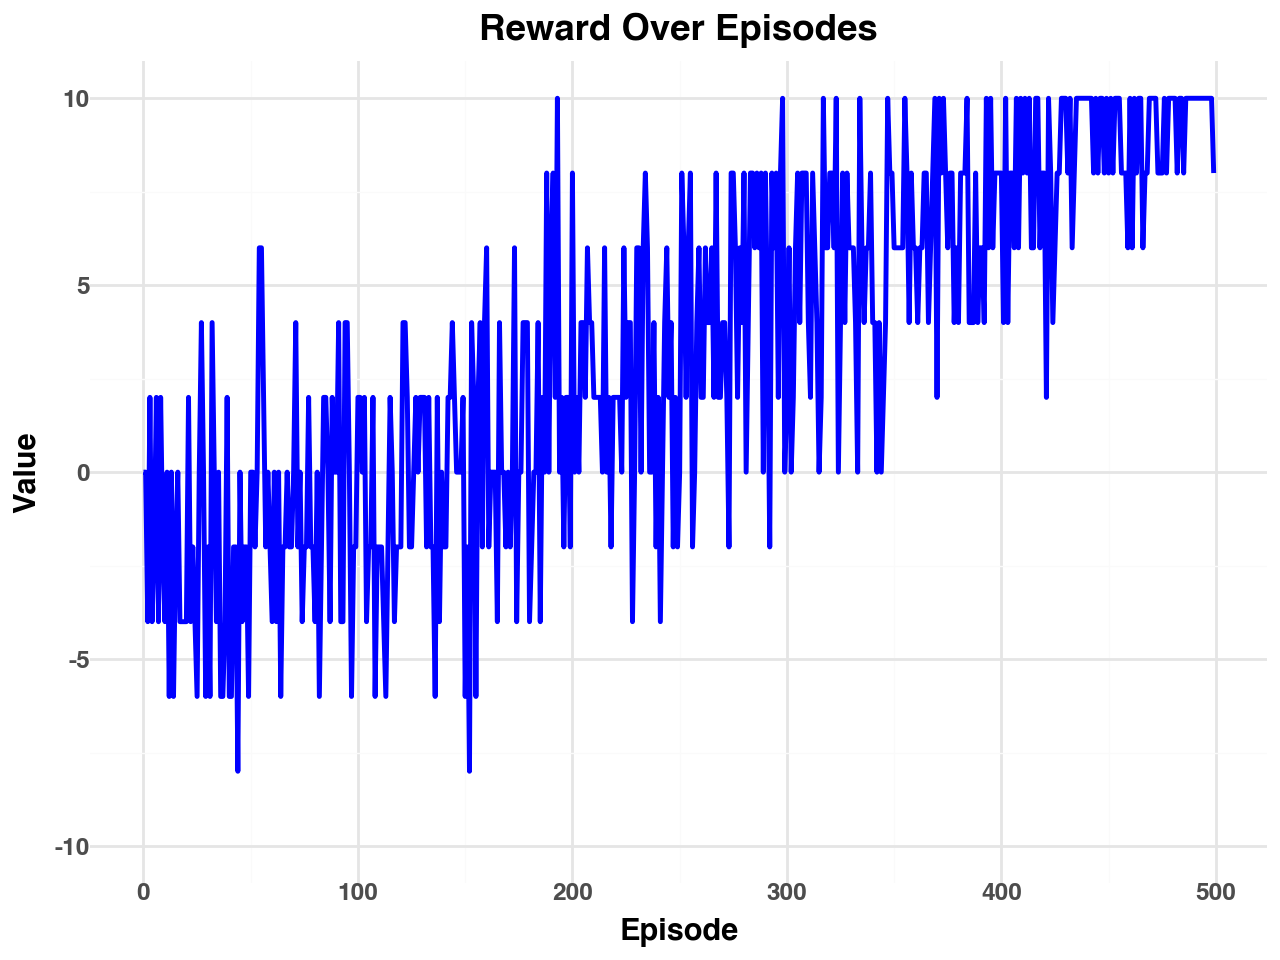

In [5]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_continuous, scale_color_manual, scale_color_identity, guide_legend

plot = (
    ggplot(df_rewards, aes(x='Episode'))  # Define x-axis
    + geom_line(aes(y='Reward'), color='blue', size=1)  # Line 1 (blue)
    # + geom_line(aes(y='Number_of_Tasks'), color='yellow', size=1)  # Line 2 (yellow)
    # + geom_line(aes(y='Number_of_Resources'), color='orange', size=1)  # Line 3 (orange)
    + scale_color_identity(
        name='Line Type',  # Legend title
        # breaks=['blue', 'yellow', 'orange'],  # Colors used in the plot
        labels=['Reward (Blue)', 'Tasks (Yellow)', 'Resources (Orange)'],  # Legend labels
        guide=guide_legend()  # Force a legend
    )
    + labs(title='Reward Over Episodes', x='Episode', y='Value')  # Add labels and title
    + scale_y_continuous(limits=(-10, 10))
    + theme_minimal()  # Use a minimal theme
)

# Display the plot
display(plot)

In [6]:
import pandas as pd
import ast

def get_tasks(file_path):
    
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store data
    episodes = []
    rewards = []
    task_names = []
    task_complexities = []
    task_deadlines = []

    # Parse the file
    episode = None
    reward = None
    for line in lines:
        if line.startswith("Episode"):
            # Extract episode number and reward
            episode_info = line.strip().split(":")
            episode = int(episode_info[0].split()[1])  # Extract episode number
            reward = float(episode_info[2].strip())    # Extract reward
        elif line.startswith("[{") and 'complexity' in line:
            # Extract task information
            tasks = ast.literal_eval(line.strip())  # Convert string to list of dictionaries
            for i, task in enumerate(tasks):
                task_name = f"Task_{i+1}"  # Generate task name (e.g., Task_1, Task_2, etc.)
                task_complexity = task['complexity']
                task_deadline = task['deadline']
                # Append data to lists
                episodes.append(episode)
                rewards.append(reward)
                task_names.append(task_name)
                task_complexities.append(task_complexity)
                task_deadlines.append(task_deadline)

    # Create a DataFrame
    df = pd.DataFrame({
        'Episode': episodes,
        'Reward': rewards,
        'Task_Name': task_names,
        'Task_Complexity': task_complexities,
        'Task_Deadline': task_deadlines
    })

    return df

# Example usage:
df_tasks = get_tasks(output_file)
display(df_tasks)

,Episode,Reward,Task_Name,Task_Complexity,Task_Deadline
0,0,0.0,Task_1,1.130521,1.777565
1,0,0.0,Task_2,1.753566,1.025561
2,0,0.0,Task_3,1.271988,1.383350
3,0,0.0,Task_4,1.551491,0.894332
4,0,0.0,Task_5,1.777566,1.889864
...,...,...,...,...,...
4995,499,8.0,Task_6,1.600106,1.949589
4996,499,8.0,Task_7,1.496191,1.679030
4997,499,8.0,Task_8,1.726278,1.899874
4998,499,8.0,Task_9,1.310547,1.347674


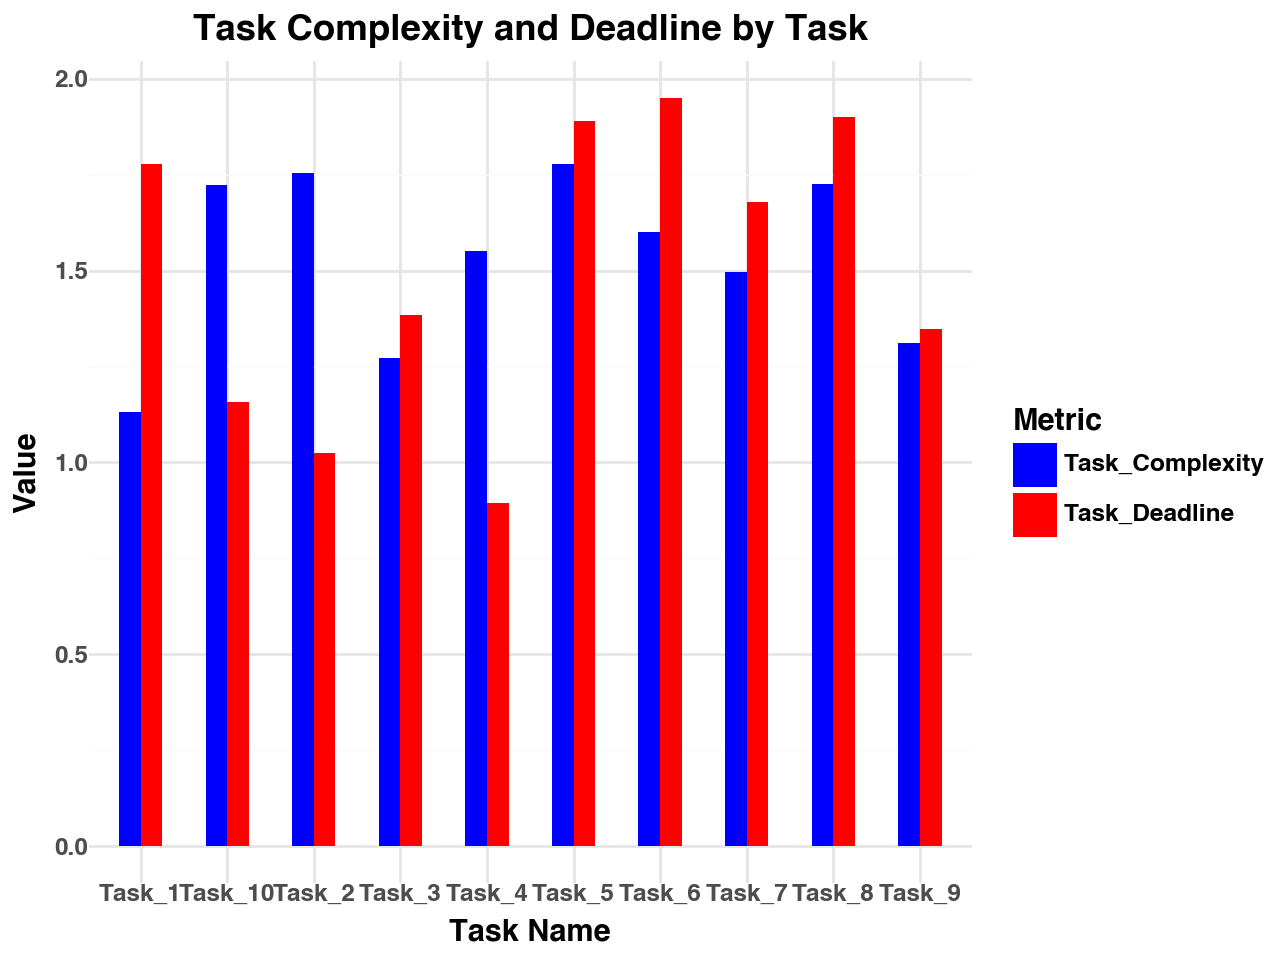

In [7]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs, theme_minimal, scale_fill_manual
import pandas as pd

# Assuming your DataFrame is named `df`
# Reshape the DataFrame for plotting
df_tasks_melted = df_tasks.melt(id_vars=['Episode', 'Reward', 'Task_Name'], 
                    value_vars=['Task_Complexity', 'Task_Deadline'], 
                    var_name='Metric', value_name='Value')

# Create the plot
plot = (
    ggplot(df_tasks_melted, aes(x='Task_Name', y='Value', fill='Metric'))  # Task_Name on x-axis, Value on y-axis, and Metric for fill
    + geom_bar(stat='identity', position=position_dodge(width=0.5), width=0.5)  # Grouped bars
    + labs(title='Task Complexity and Deadline by Task', x='Task Name', y='Value')  # Add title and axis labels
    + scale_fill_manual(values={'Task_Complexity': 'blue', 'Task_Deadline': 'red'})  # Custom colors for bars
    + theme_minimal()  # Use a minimal theme
)

# Display the plot
display(plot)

In [8]:
import pandas as pd
import ast
from collections import Counter

def get_resources(file_path):
    
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store data
    episodes = []
    rewards = []
    resource_names = []
    resource_capacities = []
    selected_counts = []

    # Parse the file
    episode = None
    reward = None
    resource_selection = None
    resources = None

    for line in lines:
        if line.startswith("Episode"):
            # Extract episode number and reward
            episode_info = line.strip().split(":")
            episode = int(episode_info[0].split()[1])  # Extract episode number
            reward = float(episode_info[2].strip())    # Extract reward
        elif line.startswith("[{") and 'cpu_capacity' in line:
            # Extract resource information
            resources = ast.literal_eval(line.strip())  # Convert string to list of dictionaries
        elif line.startswith("[") and not line.startswith("[{"):
            # Extract resource selection counts
            resource_selection = ast.literal_eval(line.strip())  # Convert string to list of selections
            selection_counts = Counter(resource_selection)  # Count occurrences of each resource index
            
            # Append data to lists
            for i, resource in enumerate(resources):
                resource_name = f"Resource_{i+1}"  # Generate resource name (e.g., Resource_1, Resource_2, etc.)
                resource_capacity = resource['cpu_capacity']
                selected_count = selection_counts.get(i, 0)  # Get count for this resource, default to 0 if not selected
                
                episodes.append(episode)
                rewards.append(reward)
                resource_names.append(resource_name)
                resource_capacities.append(resource_capacity)
                selected_counts.append(selected_count)

    # Create a DataFrame
    df_resources = pd.DataFrame({
        'Episode': episodes,
        'Reward': rewards,
        'Resource_Name': resource_names,
        'Resource_Capacity': resource_capacities,
        'Selected_Count': selected_counts
    })

    return df_resources

# Example usage:
df_resources = get_resources(output_file)
display(df_resources)

,Episode,Reward,Resource_Name,Resource_Capacity,Selected_Count
0,0,0.0,Resource_1,1.943518,5
1,0,0.0,Resource_2,0.603090,1
2,0,0.0,Resource_3,0.537667,4
3,1,0.0,Resource_1,1.943518,5
4,1,0.0,Resource_2,0.603090,3
...,...,...,...,...,...
1495,498,10.0,Resource_2,0.603090,0
1496,498,10.0,Resource_3,0.537667,0
1497,499,8.0,Resource_1,1.943518,9
1498,499,8.0,Resource_2,0.603090,1


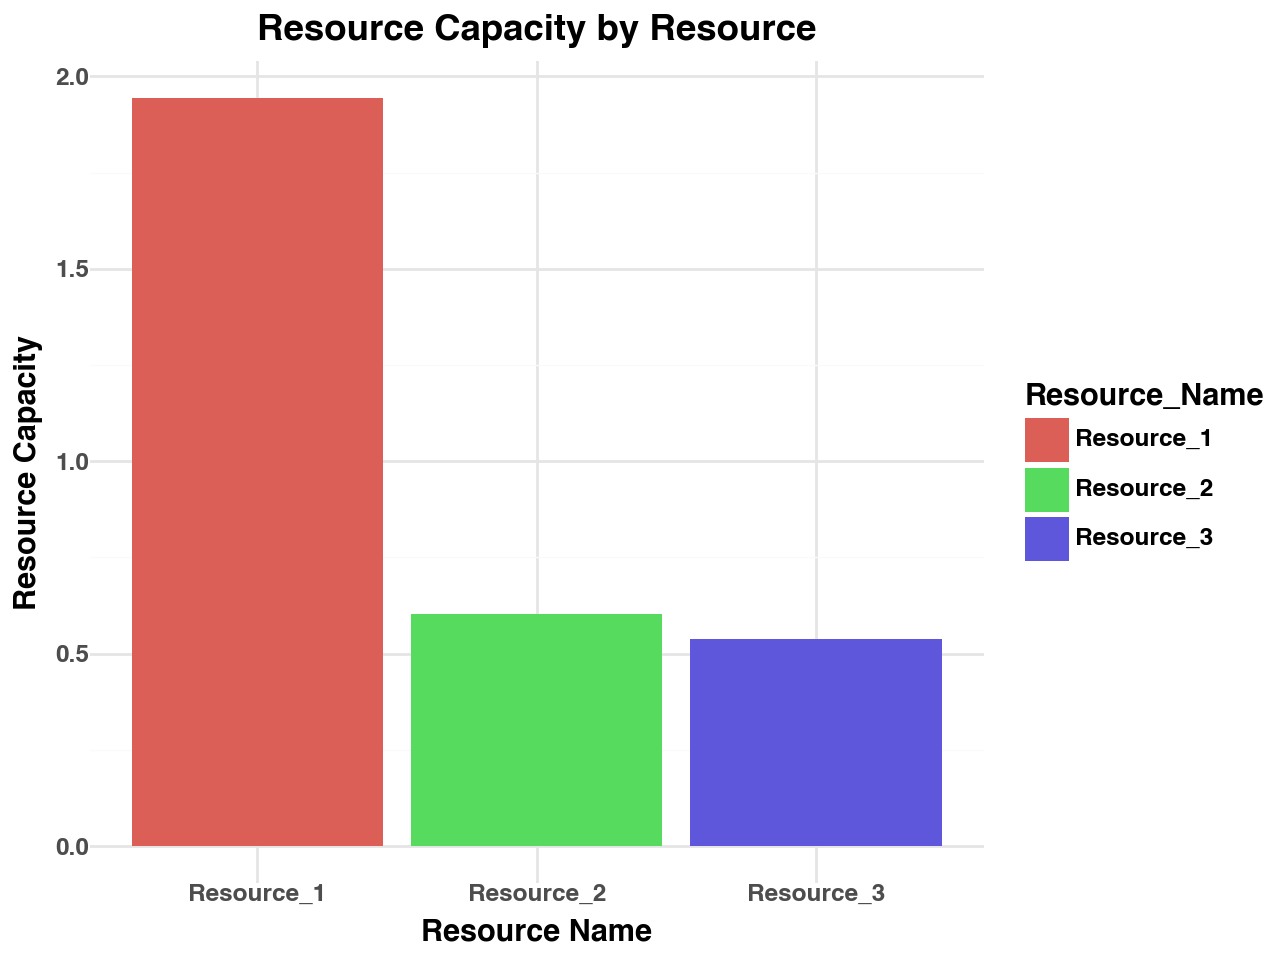

In [9]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

# Assuming your DataFrame is named `df`
# Aggregate Resource_Capacity for each resource
df_capacity = df_resources.groupby('Resource_Name')['Resource_Capacity'].mean().reset_index()

# Create the plot
capacity_plot = (
    ggplot(df_capacity, aes(x='Resource_Name', y='Resource_Capacity', fill='Resource_Name'))  # Resource_Name on x-axis, Resource_Capacity on y-axis
    + geom_bar(stat='identity')  # Bar plot
    + labs(title='Resource Capacity by Resource', x='Resource Name', y='Resource Capacity')  # Add title and axis labels
    + theme_minimal()  # Use a minimal theme
)

# Display the plot
display(capacity_plot)

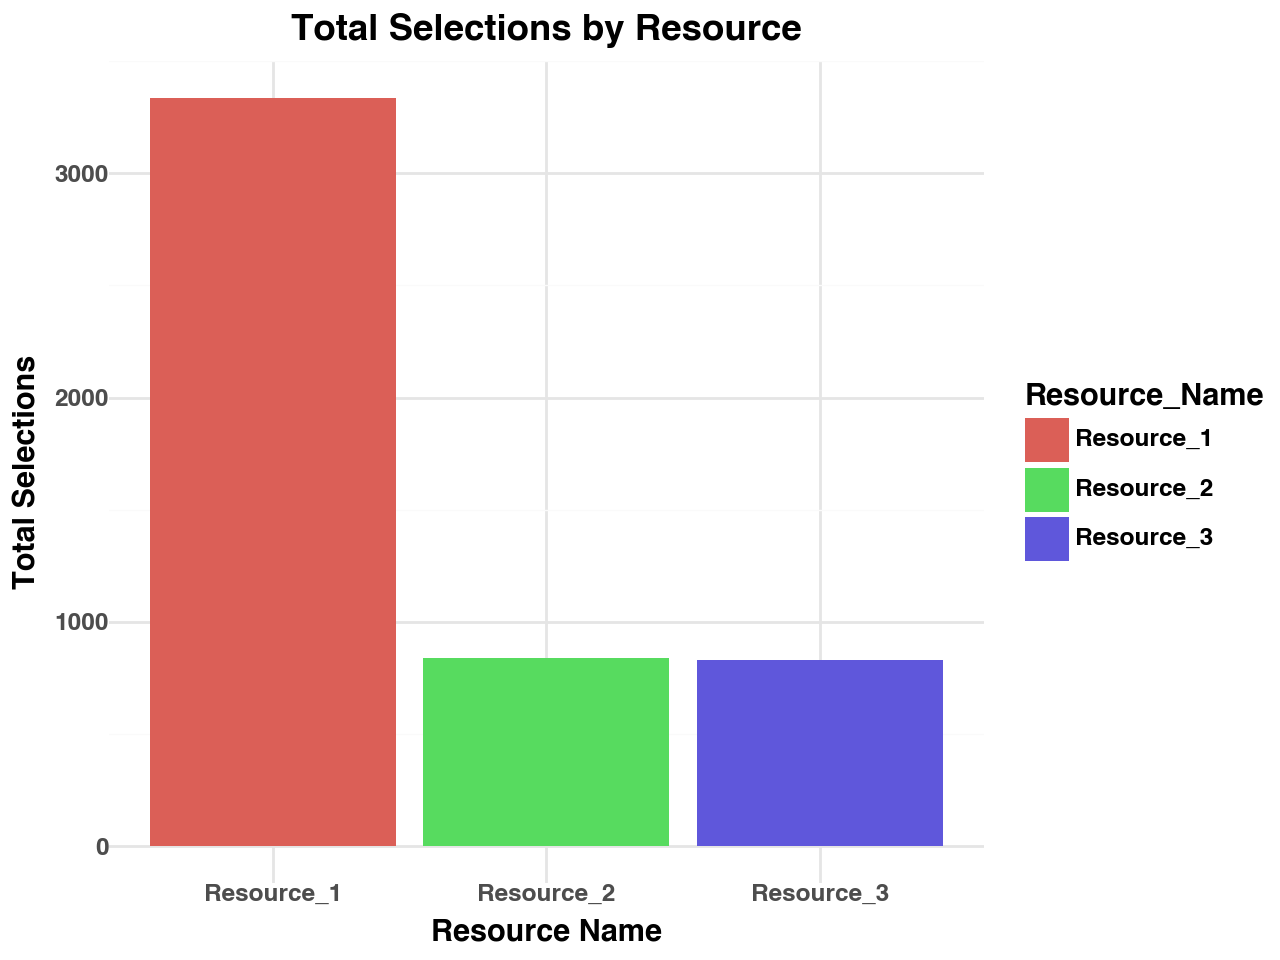

In [10]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

# Aggregate total selections for each resource
df_selections = df_resources.groupby('Resource_Name')['Selected_Count'].sum().reset_index()

# Create the plot
selections_plot = (
    ggplot(df_selections, aes(x='Resource_Name', y='Selected_Count', fill='Resource_Name'))  # Resource_Name on x-axis, Selected_Count on y-axis
    + geom_bar(stat='identity')  # Bar plot
    + labs(title='Total Selections by Resource', x='Resource Name', y='Total Selections')  # Add title and axis labels
    + theme_minimal()  # Use a minimal theme
)

# Display the plot
display(selections_plot)

In [11]:
output_file_dynamic = 'pytorch_dynamic_output.txt'
!python pytorch_dynamic.py > {output_file}

,Episode,Reward,Number_of_Tasks,Number_of_Resources,Normalized_Reward
0,0,-12.0,16,4,-0.750000
1,1,2.0,6,2,0.333333
2,2,0.0,14,2,0.000000
3,3,6.0,18,4,0.333333
4,4,1.0,15,4,0.066667
...,...,...,...,...,...
1995,1995,5.0,9,2,0.555556
1996,1996,-3.0,15,3,-0.200000
1997,1997,-3.0,5,4,-0.600000
1998,1998,9.0,17,2,0.529412


/home/memedi/.pyenv/versions/3.11.10/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


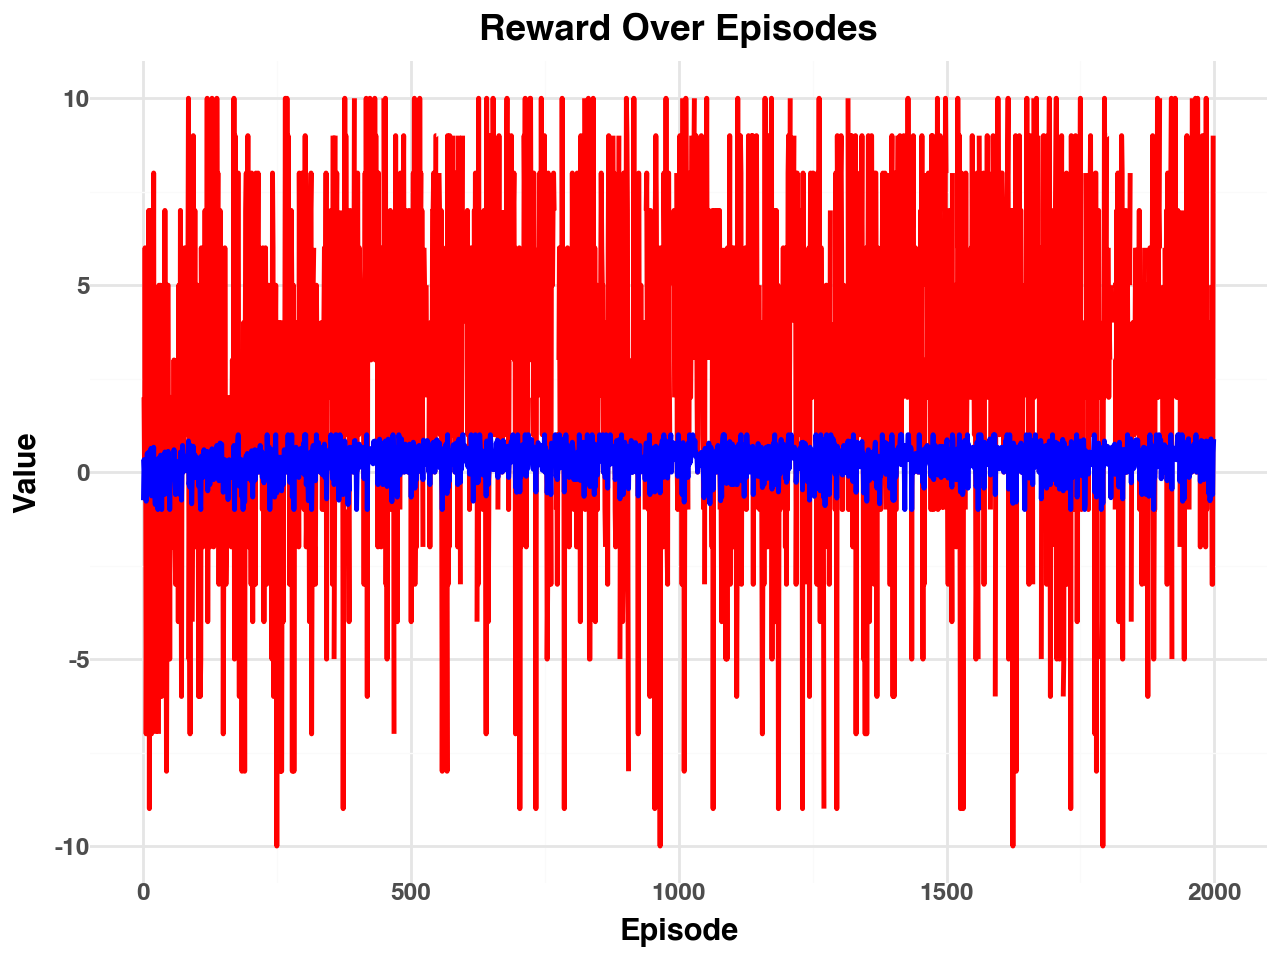

In [12]:
df_reward_dynamic = get_rewards(output_file_dynamic)

df_reward_dynamic['Normalized_Reward'] = df_reward_dynamic['Reward'] / df_reward_dynamic['Number_of_Tasks']
display(df_reward_dynamic)

from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_continuous, scale_color_manual, scale_color_identity, guide_legend

plot = (
    ggplot(df_reward_dynamic, aes(x='Episode'))  # Define x-axis
    + geom_line(aes(y='Reward'), color='red', size=1)  # Line 1 (blue)
    + geom_line(aes(y='Normalized_Reward'), color='blue', size=1)  # Line 1 (blue)
    # + geom_line(aes(y='Number_of_Tasks'), color='yellow', size=1)  # Line 2 (yellow)
    # + geom_line(aes(y='Number_of_Resources'), color='orange', size=1)  # Line 3 (orange)
    + scale_color_identity(
        name='Line Type',  # Legend title
        breaks=['blue', 'yellow', 'orange'],  # Colors used in the plot
        labels=['Reward (Blue)', 'Tasks (Yellow)', 'Resources (Orange)'],  # Legend labels
        guide=guide_legend()  # Force a legend
    )
    + labs(title='Reward Over Episodes', x='Episode', y='Value')  # Add labels and title
    + scale_y_continuous(limits=(-10, 10))
    + theme_minimal()  # Use a minimal theme
)



# Display the plot
display(plot)

,Episode,Reward,Resource_Name,Resource_Capacity,Selected_Count
0,0,1.0,Resource_1,1.753052,6
1,0,1.0,Resource_2,0.584254,3
2,0,1.0,Resource_3,1.110448,6
3,1,4.0,Resource_1,1.920579,5
4,1,4.0,Resource_2,1.839239,3
...,...,...,...,...,...
5942,1998,3.0,Resource_4,0.513067,0
5943,1999,-1.0,Resource_1,0.695510,3
5944,1999,-1.0,Resource_2,1.050828,0
5945,1999,-1.0,Resource_3,0.778174,0


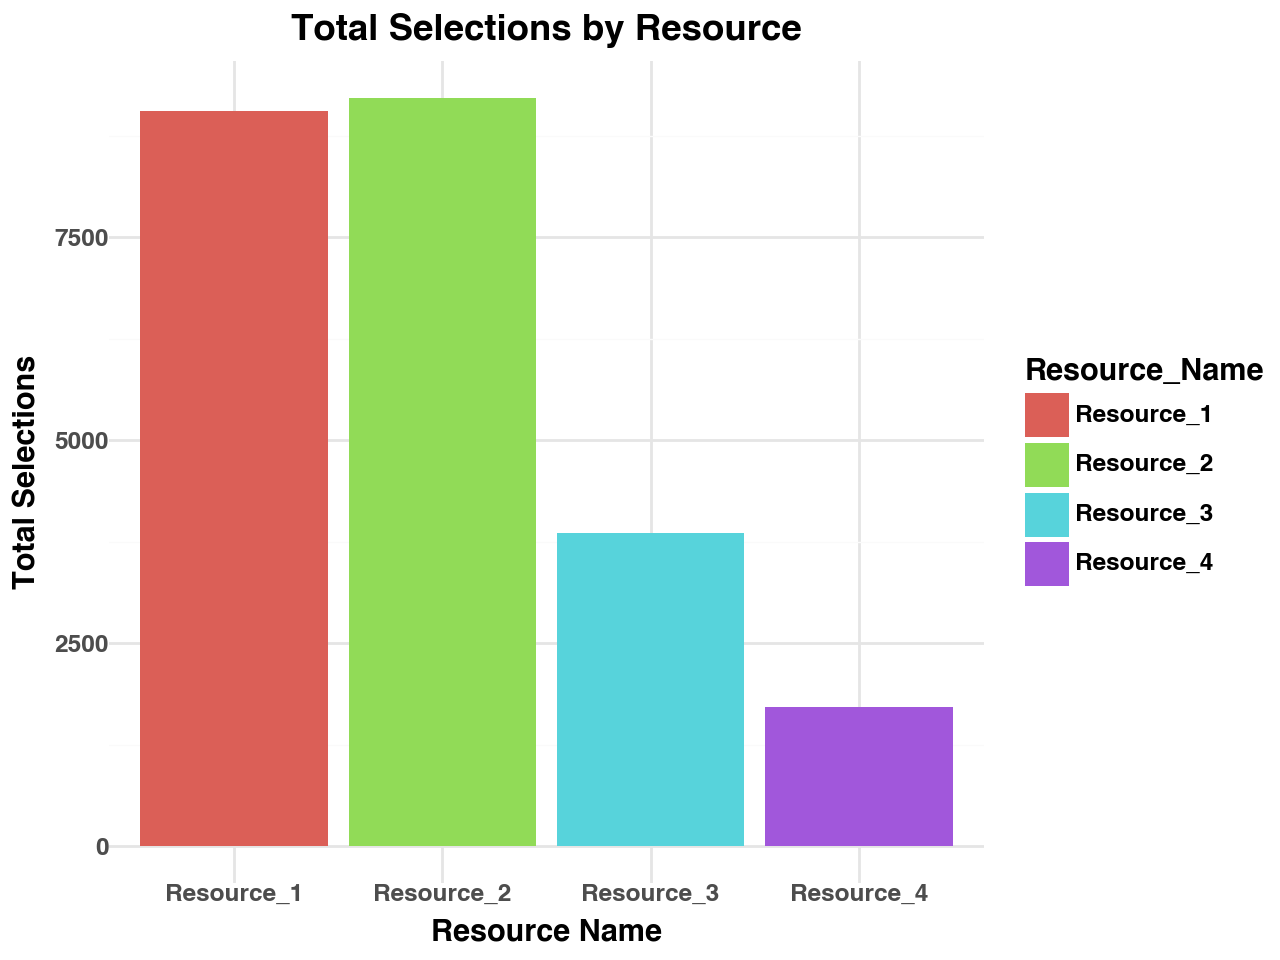

In [13]:
# df_tasks_dynamic = get_tasks(output_file_dynamic)
# display(df_tasks_dynamic)

# Example usage:
df_resources_dynamic = get_resources(output_file)
display(df_resources_dynamic)

from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

# Aggregate total selections for each resource
df_selections_dynamic = df_resources_dynamic.groupby('Resource_Name')['Selected_Count'].sum().reset_index()

# Create the plot
selections_plot = (
    ggplot(df_selections_dynamic, aes(x='Resource_Name', y='Selected_Count', fill='Resource_Name'))  # Resource_Name on x-axis, Selected_Count on y-axis
    + geom_bar(stat='identity')  # Bar plot
    + labs(title='Total Selections by Resource', x='Resource Name', y='Total Selections')  # Add title and axis labels
    + theme_minimal()  # Use a minimal theme
)

# Display the plot
display(selections_plot)

In [14]:
import pandas as pd

import pandas as pd
import re

def parse_episode_file(file_path):
    # Initialize an empty list to store the extracted data
    data = []
    
    # Open the file and read it line by line
    with open(file_path, 'r') as file:
        episode_data = {}
        for line in file:
            # Check if the line starts with "Episode"
            if line.startswith("Episode"):
                # If episode_data is not empty, append it to the data list
                if episode_data:
                    data.append(episode_data)
                    episode_data = {}
                
                # Extract the episode number and total reward
                episode_number = int(re.search(r'Episode (\d+):', line).group(1))
                total_reward = float(re.search(r'Total Reward: ([\d.-]+)', line).group(1))
                episode_data['Episode'] = episode_number
                episode_data['Total_Reward'] = total_reward
            
            # Extract Number_of_Tasks
            elif line.startswith("Number_of_Tasks"):
                number_of_tasks = int(re.search(r'Number_of_Tasks (\d+)', line).group(1))
                episode_data['Number_of_Tasks'] = number_of_tasks
            
            # Extract Count_Best
            elif line.startswith("Count_Best"):
                count_best = int(re.search(r'Count_Best (\d+)', line).group(1))
                episode_data['Count_Best'] = count_best
            
            # Extract Count_Other
            elif line.startswith("Count_Other"):
                count_other = int(re.search(r'Count_Other (\d+)', line).group(1))
                episode_data['Count_Other'] = count_other
            
            # Extract Ratio_Best
            elif line.startswith("Ratio_Best"):
                ratio_best = float(re.search(r'Ratio_Best ([\d.]+)', line).group(1))
                episode_data['Ratio_Best'] = ratio_best

            elif line.startswith("Best_resource_changed"):
                episode_data['Best_Resource_Changed'] = line.split()[-1]
        
        # Append the last episode_data to the data list
        if episode_data:
            data.append(episode_data)
    
    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df

# Example usage:
# df = parse_episode_file('path_to_your_file.txt')
# print(df)

# Example usage:
df_per_episode_dynamic = parse_episode_file(output_file_dynamic)
display(df_per_episode_dynamic)

,Episode,Total_Reward,Number_of_Tasks,Count_Best,Count_Other,Ratio_Best,Best_Resource_Changed
0,0,-12.0,16,2,14,0.125000,1
1,1,2.0,6,3,3,0.500000,1
2,2,0.0,14,8,6,0.571429,0
3,3,6.0,18,4,14,0.222222,0
4,4,1.0,15,3,12,0.200000,1
...,...,...,...,...,...,...,...
1995,1995,5.0,9,8,1,0.888889,1
1996,1996,-3.0,15,4,11,0.266667,1
1997,1997,-3.0,5,0,5,0.000000,0
1998,1998,9.0,17,17,0,1.000000,1


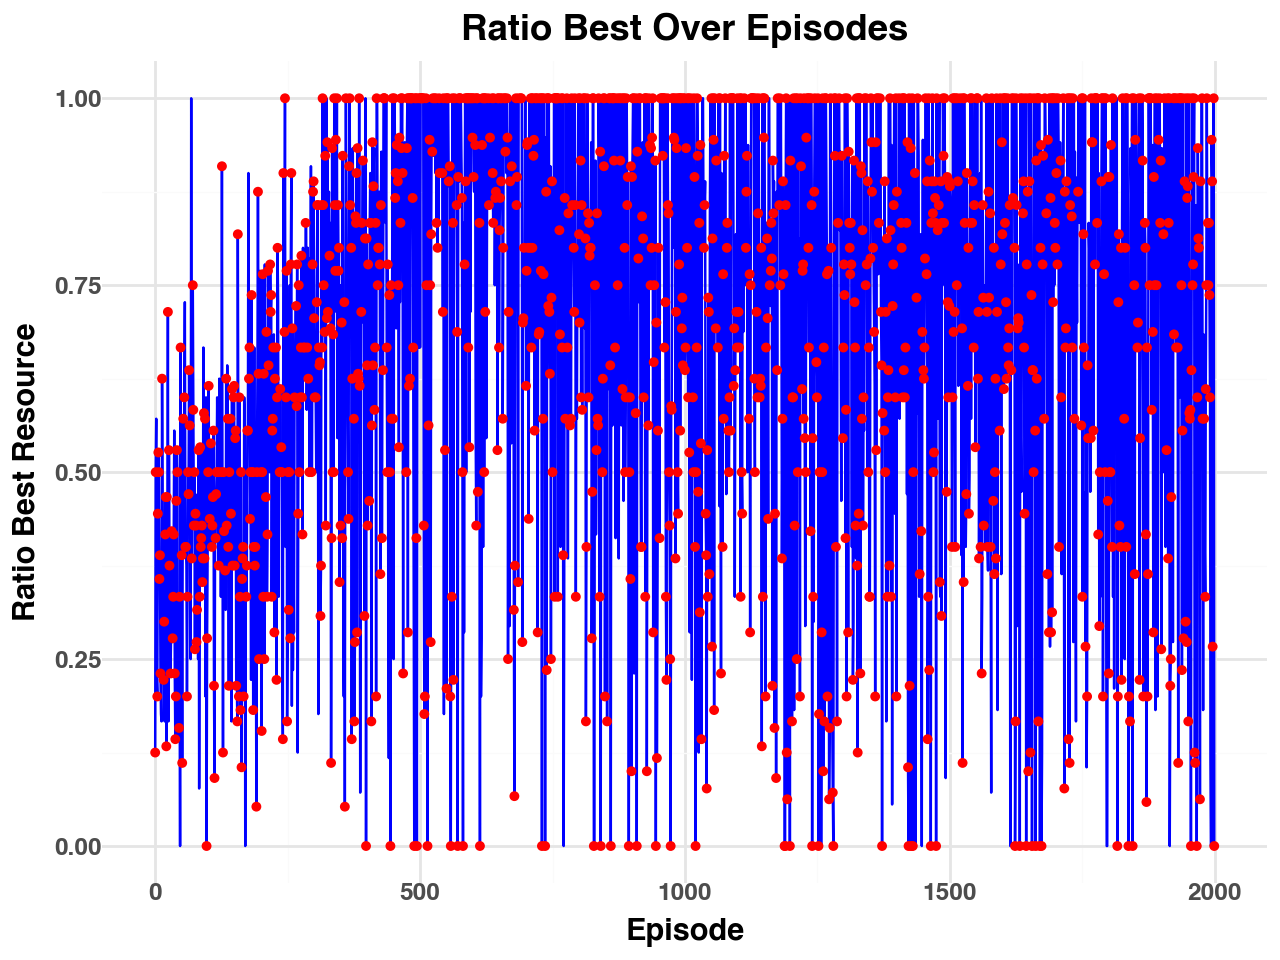

In [19]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, xlim

# print(df_per_episode_dynamic.dtypes)

# Create the plot
plot = (
    ggplot(df_per_episode_dynamic, aes(x='Episode', y='Ratio_Best'))  # Define x and y axes
    + geom_line(color='blue')  # Add a line plot
    + geom_point(
        data=df_per_episode_dynamic[df_per_episode_dynamic['Best_Resource_Changed'] == '1'],  # Filter data
        color='red',  # Set point color
        size=1  # Set point size
    )  # Add points where Best_Resource_Changed is 1
    + labs(title='Ratio Best Over Episodes', x='Episode', y='Ratio Best Resource')  # Add labels and title
    + theme_minimal()  # Use a minimal theme
    # + xlim(0,150)
)

# Display the plot
display(plot)